# <center>Семинар №4<center>
### <left>Выполнил(a): Макарьев Максим Евгеньевич<left>
### <left>Группа: ИДБ-22-11<left>

## Задание

Вы будете работать с набором данных Wine Dataset из библиотеки scikit-learn. Этот набор данных содержит информацию о химических свойствах различных видов вина из Италии. Цель состоит в том, чтобы классифицировать вина по трем различным сортам на основе их характеристик.

В рамках задания вам необходимо:

- Загрузить и исследовать данные.
- Разделить данные на обучающую и тестовую выборки.
- Обучить базовую модель классификации.
- Оценить модель с помощью перекрестной проверки.
- Выполнить подбор гиперпараметров с использованием GridSearchCV и RandomizedSearchCV.
- Оценить улучшенную модель с использованием различных метрик.
- Визуализировать результаты оценки модели.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)
from sklearn.svm import SVC

In [3]:
# Загрузка данных
data = load_wine()

# Извлечение признаков и целевой переменной
X = data.data
y = data.target

# Создайте DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [4]:
# Выведите первые 5 строк DataFrame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Разделите данные на обучающую и тестовую выборки в соотношении 70% на обучение и 30% на тест.

In [5]:
# Разделение данных на обучающую и тестовую выборки (70% на обучение, 30% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Вывод размеров полученных выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (124, 13)
Размер тестовой выборки: (54, 13)


Используйте алгоритм SVC с параметрами по умолчанию для обучения модели на обучающей выборке.

In [6]:
# Создание экземпляра модели SVM с параметрами по умолчанию
model = SVC()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

SVC()

Выполните 5-кратную перекрестную проверку на обучающих данных и выведите среднюю точность.

In [7]:
# Выполнение 5-кратной перекрестной проверки
scores = cross_val_score(model, X_train, y_train, cv=5)

# Вывод оценок точности для каждого фолда и средней точности
print("Оценки точности на кросс-валидации:", scores)
print("Средняя точность кросс-валидации:", scores.mean())

Оценки точности на кросс-валидации: [0.6   0.6   0.72  0.68  0.625]
Средняя точность кросс-валидации: 0.645


Определите сетку гиперпараметров для `SVC` и выполните подбор гиперпараметров с помощью `GridSearchCV`.

In [8]:
# Задаем сетку гиперпараметров для SVC
param_grid = {
    'C': [0.1, 1, 10, 100],          # Параметр регуляризации
    'gamma': [1, 0.1, 0.01, 0.001],  # Коэффициент ядра
    'kernel': ['linear', 'rbf']      # Тип ядра (линейное или радиально-базисное)
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Выполнение поиска по сетке гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, 

Определите распределение гиперпараметров и выполните подбор гиперпараметров с помощью `RandomizedSearchCV`.

In [9]:
# Задаем распределение гиперпараметров для SVC
param_dist = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'rbf']
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42)

# Выполнение случайного поиска по гиперпараметрам
random_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры (Random Search):", random_search.best_params_)
print("Лучшая оценка (Random Search):", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................C=0.001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=100.0, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END .................C=100.0, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END .................C=100.0, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END .................C=100.0, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END .................C=100.0, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=0.01, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=1.0, k

Используйте лучшую модель, найденную с помощью GridSearchCV или RandomizedSearchCV, для предсказания на тестовой выборке. Оцените модель с использованием метрик:

- Точность (Accuracy)
- Полнота (Recall)
- Точность (Precision)
- F1-мера
- Матрица ошибок

In [12]:
# Получите лучшую модель (из RandomizedSearchCV или GridSearchCV)
best_model = grid_search.best_estimator_

# Предскажите метки на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычислите метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выведите метрики
print("Точность (Accuracy):", accuracy)
print("Точность (Precision):", precision)
print("Полнота (Recall):", recall)
print("F1-мера:", f1)

# Выведите отчет классификации
print("Отчет классификации:\n", classification_report(y_test, y_pred))

Точность (Accuracy): 1.0
Точность (Precision): 1.0
Полнота (Recall): 1.0
F1-мера: 1.0
Отчет классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Постройте матрицу ошибок для тестовой выборки.

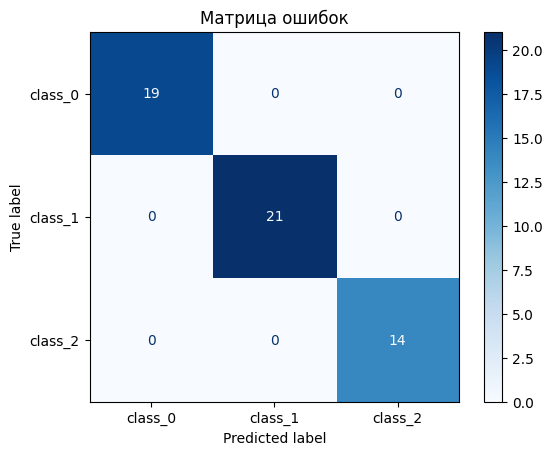

In [13]:
# Постройте и отобразите матрицу ошибок
disp = ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test,
    display_labels=data.target_names,
    cmap=plt.cm.Blues
)
plt.title('Матрица ошибок')
plt.show()


# Заключение

Результаты демонстрируют, что с правильным подбором гиперпараметров и применением методов оценки можно достичь высокой точности классификации с использованием алгоритма SVC.

Подбор гиперпараметров значительно повысил точность модели. Модель SVC показала хорошие результаты, что подтверждается высоким уровнем метрик и небольшой долей ошибок в матрице ошибок.